# Project : TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction <a id='intro'></a>
This is the project of investigation in the TMDB Movies Dataset. We have three tables inside :

- tmdb_movies_df : is the original table coming from the 'tmdb-movies.csv' file ;
- tmdb_movies_best : this is the table resulting from the search of the most popular genres ;
- tmdb_movies_profit : result from the finding of the most profitable movies.

The questions to be answered are :

1. Which genres are most popular from year to year ?
2. What are the most profitable movies ?
3. Which kinds of properties are associated with movies that have high revenues ?

First of all, we have to import four libraries :

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

def plot_2_hist(df_1, df_2, label_1, label_2) :
    plt.hist(df_1, color='r', alpha=0.5, label=label_1)
    plt.hist(df_2, color='b', alpha=0.5, label=label_2)
    plt.legend()
    plt.show() 

# Data Wrangling <a id='wrangling'></a>

### General Properties

The datas will be loaded and we will look at thier properties step by step.

In [2]:
tmdb_movies_df = pd.read_csv('tmdb-movies.csv')
tmdb_movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmdb_movies_df.shape

(10866, 21)

In [4]:
tmdb_movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
tmdb_movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
tmdb_movies_df.original_title.duplicated().sum()

295

# Data Cleaning

It is time to clean those datas. We have noticed that :
- some columns do not interest us, we will delete them ;
- the type of the column ' release_date' was not suitable, we will change it.
- some values of the 'genres' column were missing, we will add one.
- some values of the 'original_title' column were repeated, they will be deleted.

In [8]:
# After discussing the structure of the data and any problems that need to be cleaned,
# perform those cleaning steps in the second part of this section.

tmdb_movies_df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1)
tmdb_movies_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10866 non-null  int64         
 7   genres                10843 non-null  object        
 8   production_companies  9836 non-null   object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
 13  budget_adj      

In [10]:
tmdb_movies_df['genres'] = tmdb_movies_df['genres'].fillna('Other|None')
tmdb_movies_df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
tmdb_movies_df.drop_duplicates(inplace=True)
tmdb_movies_df['original_title'].duplicated().sum()

294

In [12]:
tmdb_movies_df['original_title'].nunique()

10571

The removing of duplicated values from column 'original_title' didn't work, we don't know why.

# Exploratory Data Analysis <a id='eda'></a>

This is time to explore the TMDB Movies Dataset and then, answer our three questions.
### 1 Which genres are most popular from year to year ?
To answer this question, we thought of isolating the most popular genres of each year, then grouping them into a single dataframe called 'tmdb_movies_best'.

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add Markdown cells to document your observations
# and findings.
tmdb_movies_df[['genres', 'popularity', 'release_year']]

,genres,popularity,release_year
0,Action|Adventure|Science Fiction|Thriller,32.985763,2015
1,Action|Adventure|Science Fiction|Thriller,28.419936,2015
2,Adventure|Science Fiction|Thriller,13.112507,2015
3,Action|Adventure|Science Fiction|Fantasy,11.173104,2015
4,Action|Crime|Thriller,9.335014,2015
...,...,...,...
10861,Documentary,0.080598,1966
10862,Action|Adventure|Drama,0.065543,1966
10863,Mystery|Comedy,0.065141,1966
10864,Action|Comedy,0.064317,1966


In [14]:
tmdb_movies_rate = []

for i in tmdb_movies_df['release_year']:
    tmdb_movies_year = tmdb_movies_df.query('release_year == {}'.format(i))
    maximum = tmdb_movies_year['popularity'].max()
    if maximum in tmdb_movies_rate :
        continue
    else :
        tmdb_movies_rate.append(maximum)

tmdb_movies_rate

[32.985763,
 24.949134,
 12.037933,
 9.432768,
 9.363643,
 8.947905,
 8.575419,
 8.46666799999999,
 8.411577000000001,
 8.095275,
 8.09375399999999,
 7.637767,
 7.122455,
 6.66898999999999,
 6.112766000000001,
 6.095293,
 5.939927,
 5.838503,
 5.827781,
 5.738034,
 5.488441000000001,
 4.965391,
 4.935897,
 4.831966,
 4.828854,
 4.76535899999999,
 4.586426,
 4.5783,
 4.480733,
 4.271452,
 4.215642,
 4.180540000000001,
 4.143585,
 3.852269,
 3.7774410000000005,
 3.474728,
 3.309196,
 3.264571,
 3.258151,
 3.170651,
 3.153791,
 3.072555,
 2.679627,
 2.631987,
 2.610362,
 2.5826569999999998,
 2.571339,
 2.550704,
 2.508235,
 2.485419,
 2.2724860000000002,
 1.9369619999999999,
 1.910465,
 1.778746,
 1.697618,
 1.227582]

In [15]:
len(tmdb_movies_rate)

56

In [16]:
tmdb_movies_best = tmdb_movies_df.query('popularity == {}'.format(tmdb_movies_rate))
tmdb_movies_best

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
1919,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,2010,1.600000e+08,8.255000e+08
2409,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,5923,8.1,1999,8.247033e+07,1.320229e+08
2633,8.575419,93000000,871368364,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,178,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,2001-12-18,6079,7.8,2001,1.145284e+08,1.073080e+09
2875,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09
3371,8.411577,0,0,Underworld: Endless War,Trevor Devall|Brian Dobson|Paul Dobson|Laura H...,Juno John Lee,18,Action|Animation|Horror,NaN,2011-10-19,21,5.9,2011,0.000000e+00,0.000000e+00
3911,8.095275,79000000,926287400,The Lord of the Rings: The Two Towers,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,179,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,2002-12-18,5114,7.8,2002,9.576865e+07,1.122902e+09


Text(0, 0.5, 'Popularity')

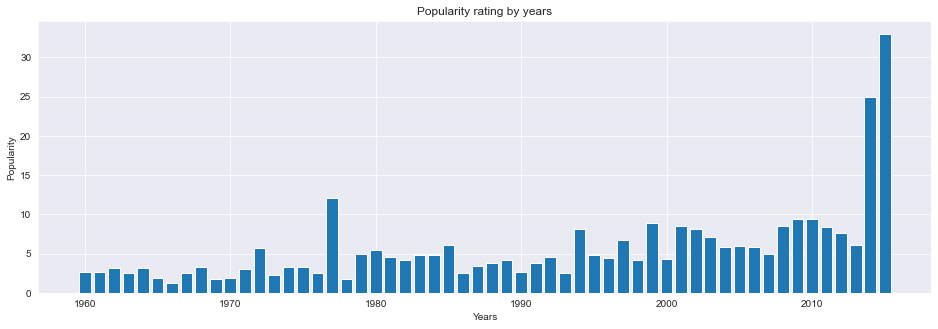

In [23]:
plt.subplots(figsize=(16, 5))
plt.bar(tmdb_movies_best.release_year, tmdb_movies_best.popularity)
plt.title('Popularity rating by years')
plt.xlabel('Years')
plt.ylabel('Popularity')

This clearly shows that the highest values are in 1977, 2014 and 2015.

### 2 What are the most profitable movies ?
To answer this question, we thought of calculating the profit (revenue - budget) of each film before grouping them into two dataframes 'tmdb_movies_profit'.

In [24]:
# Continue to explore the data to address your additional research questions. Add more headers as needed if you have
# more questions to investigate.
tmdb_movies_profit = tmdb_movies_df[['original_title', 'revenue', 'budget', 'revenue_adj', 'budget_adj']]
tmdb_movies_profit

,original_title,revenue,budget,revenue_adj,budget_adj
0,Jurassic World,1513528810,150000000,1.392446e+09,1.379999e+08
1,Mad Max: Fury Road,378436354,150000000,3.481613e+08,1.379999e+08
2,Insurgent,295238201,110000000,2.716190e+08,1.012000e+08
3,Star Wars: The Force Awakens,2068178225,200000000,1.902723e+09,1.839999e+08
4,Furious 7,1506249360,190000000,1.385749e+09,1.747999e+08
...,...,...,...,...,...
10861,The Endless Summer,0,0,0.000000e+00,0.000000e+00
10862,Grand Prix,0,0,0.000000e+00,0.000000e+00
10863,Beregis Avtomobilya,0,0,0.000000e+00,0.000000e+00
10864,"What's Up, Tiger Lily?",0,0,0.000000e+00,0.000000e+00


In [25]:
profit = tmdb_movies_df['revenue'] - tmdb_movies_df['budget']
tmdb_movies_profit.insert(3, 'profit', profit)
tmdb_movies_profit

,original_title,revenue,budget,profit,revenue_adj,budget_adj
0,Jurassic World,1513528810,150000000,1363528810,1.392446e+09,1.379999e+08
1,Mad Max: Fury Road,378436354,150000000,228436354,3.481613e+08,1.379999e+08
2,Insurgent,295238201,110000000,185238201,2.716190e+08,1.012000e+08
3,Star Wars: The Force Awakens,2068178225,200000000,1868178225,1.902723e+09,1.839999e+08
4,Furious 7,1506249360,190000000,1316249360,1.385749e+09,1.747999e+08
...,...,...,...,...,...,...
10861,The Endless Summer,0,0,0,0.000000e+00,0.000000e+00
10862,Grand Prix,0,0,0,0.000000e+00,0.000000e+00
10863,Beregis Avtomobilya,0,0,0,0.000000e+00,0.000000e+00
10864,"What's Up, Tiger Lily?",0,0,0,0.000000e+00,0.000000e+00


In [26]:
profit_adj = tmdb_movies_df['revenue_adj'] - tmdb_movies_df['budget_adj']
tmdb_movies_profit.insert(6, 'profit_adj', profit_adj)
tmdb_movies_profit

,original_title,revenue,budget,profit,revenue_adj,budget_adj,profit_adj
0,Jurassic World,1513528810,150000000,1363528810,1.392446e+09,1.379999e+08,1.254446e+09
1,Mad Max: Fury Road,378436354,150000000,228436354,3.481613e+08,1.379999e+08,2.101614e+08
2,Insurgent,295238201,110000000,185238201,2.716190e+08,1.012000e+08,1.704191e+08
3,Star Wars: The Force Awakens,2068178225,200000000,1868178225,1.902723e+09,1.839999e+08,1.718723e+09
4,Furious 7,1506249360,190000000,1316249360,1.385749e+09,1.747999e+08,1.210949e+09
...,...,...,...,...,...,...,...
10861,The Endless Summer,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00
10862,Grand Prix,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00
10863,Beregis Avtomobilya,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00
10864,"What's Up, Tiger Lily?",0,0,0,0.000000e+00,0.000000e+00,0.000000e+00


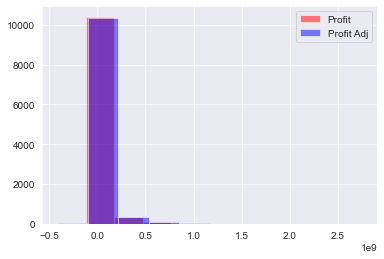

In [27]:
plot_2_hist(tmdb_movies_profit['profit'], tmdb_movies_profit['profit_adj'], 'Profit', 'Profit Adj')

We can thus observe that the profits and the profit adj are almost the same.

### 3 What kinds of properties are associated with movies that have high revenues ?
We have to select a lot of properties in movies with the two high revenues.

In [23]:
tmdb_movies_df.groupby(['revenue', 'original_title']).revenue.mean()

revenue     original_title                    
0           $5 a Day                                       0
            $9.99                                          0
            (T)Raumschiff Surprise - Periode 1             0
            1                                              0
            10                                             0
                                                     ...    
1513528810  Jurassic World                        1513528810
1519557910  The Avengers                          1519557910
1845034188  Titanic                               1845034188
2068178225  Star Wars: The Force Awakens          2068178225
2781505847  Avatar                                2781505847
Name: revenue, Length: 10784, dtype: int64

In [22]:
# Continue to explore the data to address your additional research questions. Add more headers as needed if you have
# more questions to investigate.
tmdb_movies_df.groupby(['revenue_adj', 'original_title']).revenue_adj.mean()

revenue_adj   original_title                    
0.000000e+00  $5 a Day                              0.000000e+00
              $9.99                                 0.000000e+00
              (T)Raumschiff Surprise - Periode 1    0.000000e+00
              1                                     0.000000e+00
              10                                    0.000000e+00
                                                        ...     
1.907006e+09  Jaws                                  1.907006e+09
2.167325e+09  The Exorcist                          2.167325e+09
2.506406e+09  Titanic                               2.506406e+09
2.789712e+09  Star Wars                             2.789712e+09
2.827124e+09  Avatar                                2.827124e+09
Name: revenue_adj, Length: 10786, dtype: float64

In [25]:
tmdb_movies_df[['revenue', 'revenue_adj']].describe()

,revenue,revenue_adj
count,1.086500e+04,1.086500e+04
mean,3.982690e+07,5.136900e+07
std,1.170083e+08,1.446383e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.400000e+07,3.370173e+07
max,2.781506e+09,2.827124e+09


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

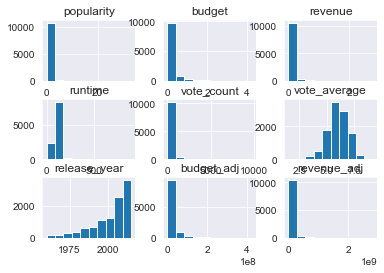

In [24]:
tmdb_movies_df.hist()

We find that the types of properties associated with films with high revenues are : popularity, budget, runtime, vote count, vote average, release year and budget adj.

In [26]:
tmdb_movies_best.to_csv('tmdb_movies_best.csv')
tmdb_movies_profit.to_csv('tmdb_movies_profit.csv')

## Conclusion <a id='conclusions'></a>
- 2015 mark the year with the most popular movie ever witch the original title "Jurassic World", following by 2014 with "Interstellar" and 1977 with "Star Wars". 
- 2.781.505.847 is the highest profit made by the movie "Avatar", following by 2.068.178.225 of "Star Wars" and 1.845.034.188 of "Titanic".
- And kind of properties associeted with movies that have high revenues are : popularity, budget, runtime, vote count, vote average, release year and budget adj.

## Limitations
- The most popular movies have results in relation to genres from year to year, but we would have liked to have more information, for example, the prizes won by these movies.
- The most profitable movies have great amount but it would have been better to have a unit for the currency like USD.
- The kind of properties associated with movies that have high revenue should have been in addition to the previews ones, place of first publication for example.